## Klasyfikacja HRV

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

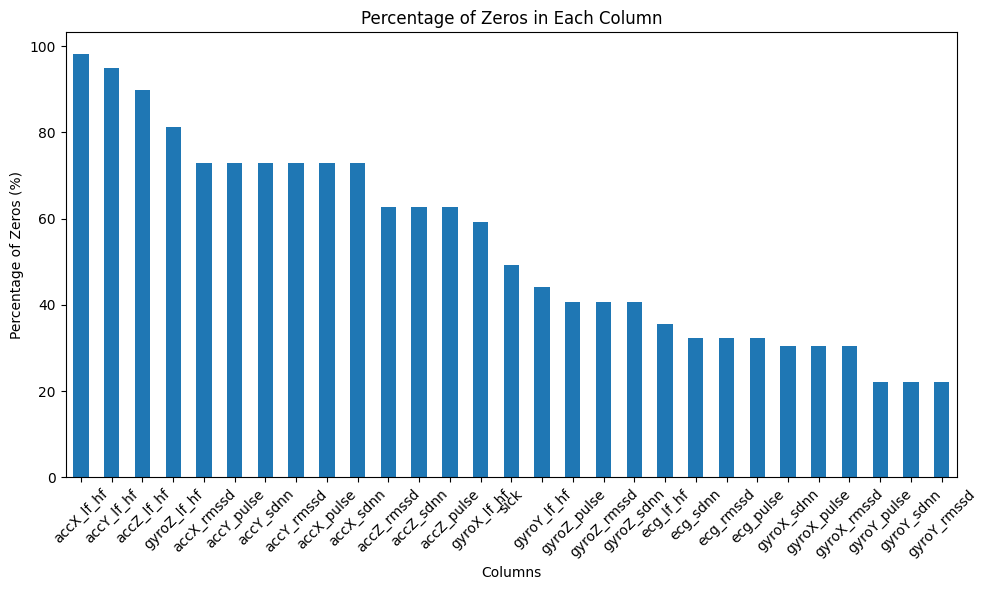

In [152]:


# Load the dataset
data = pd.read_csv('descriptors.csv')
# Remove rows where filename starts with 'CP'
data = data[~data['filename'].str.startswith('CP')]
data = data.drop("filename", axis=1)
zero_percentage = data.apply(lambda x: (x == 0).sum() / len(x) * 100)
zero_percentage = zero_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
zero_percentage.plot(kind='bar')
plt.title('Percentage of Zeros in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Zeros (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('zero_percentage.png')




In [153]:
from sklearn.model_selection import train_test_split

X = data.drop('sick', axis=1)
y = data['sick']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
print(f"data balance: {y.value_counts(normalize=True)}")


data balance: sick
1    0.508475
0    0.491525
Name: proportion, dtype: float64


Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



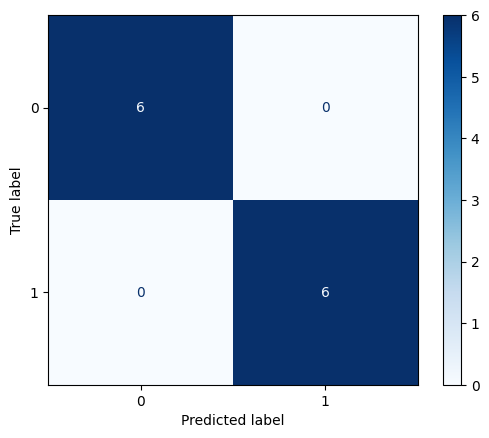

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap=plt.cm.Blues)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "NearestNeighbors",
    "LinearSVM",
    "RBFSVM",
    "GaussianProcess",
    "DecisionTree",
    "RandomForest",
    "NeuralNet",
    "AdaBoost",
    "NaiveBayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

results = pd.DataFrame(columns=['Classifier', 'Accuracy', "class-0-f1-score", "class-1-f1-score"])
for classifier, name in zip(classifiers, names):
    pipe = make_pipeline(StandardScaler(), classifier)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print(f"Confusion Matrix for {name}:")
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap=plt.cm.Blues)
    # print("\nClassification Report:")
    report = classification_report(y_test, y_pred, output_dict=True)
    # print(report)
    # plt.title(f'Confusion Matrix for {name}')
    plt.savefig(f'confusion_matrix_{name}.png')
    plt.clf()  # Clear the figure for the next plot
    results = pd.concat([results, pd.DataFrame({
        'Classifier': [name],
        'Accuracy': [report['accuracy']],
        "class-0-f1-score": [report['0']['f1-score']],
        "class-1-f1-score": [report['1']['f1-score']]
    })], ignore_index=True)
results = results.sort_values(by='Accuracy', ascending=False)
print(results)
results.to_csv('classification_results.csv', index=False)



Confusion Matrix for Nearest Neighbors:
Confusion Matrix for Linear SVM:


/tmp/ipykernel_3116/2422741516.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


Confusion Matrix for RBF SVM:
Confusion Matrix for Gaussian Process:
Confusion Matrix for Decision Tree:
Confusion Matrix for Random Forest:
Confusion Matrix for Neural Net:
Confusion Matrix for AdaBoost:
Confusion Matrix for Naive Bayes:
Confusion Matrix for QDA:
          Classifier  Accuracy  class-0-f1-score  class-1-f1-score
0  Nearest Neighbors  1.000000          1.000000          1.000000
1         Linear SVM  1.000000          1.000000          1.000000
5      Random Forest  1.000000          1.000000          1.000000
4      Decision Tree  1.000000          1.000000          1.000000
8        Naive Bayes  1.000000          1.000000          1.000000
9                QDA  1.000000          1.000000          1.000000
7           AdaBoost  0.916667          0.909091          0.923077
3   Gaussian Process  0.916667          0.909091          0.923077
6         Neural Net  0.916667          0.909091          0.923077
2            RBF SVM  0.666667          0.500000          0.75000

/home/tempk/medyczna_projekt/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/tempk/medyczna_projekt/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>